# Sporting Events: Postgame Traffic

This notebook explores and summarizes postgame traffic for each sport.

---
## Setup

In [1]:
### Libraries

import matplotlib, matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
### Additional Configuration

# Matplotlib.
% matplotlib inline

# Seaborn.
sns.set_style('whitegrid')

In [3]:
### Settings

# Import general sports settings.
from sports_settings import *

# Visualization settings and objects.
from sports_vis_objects import *

---
## Data

### Read

In [ ]:
# Read team schedules.
# games = {
#     'bruins':  pd.read_csv('../../../data/sports_analysis/bruins.csv'),
#     'celtics': pd.read_csv('../../../data/sports_analysis/celtics.csv'),
#     'sox':     pd.read_csv('../../../data/sports_analysis/sox.csv')
# }

# Read all postgame data.
postgame = {
    'bruins':  pd.read_csv('../../../data/sports_analysis/bruins_postgame.csv'),
    'celtics': pd.read_csv('../../../data/sports_analysis/celtics_postgame.csv'),
    'sox':     pd.read_csv('../../../data/sports_analysis/sox_postgame.csv')
}

### Aggregations

In [10]:
# Aggregate by hours until game.
postgame_agg = {}
for t,d in postgame.iteritems():
    postgame_agg[t] = d.groupby('hours_since_game_start').agg(np.mean).drop('game_id',axis=1).reset_index()

---
## Visualization

### Postgame Lift by Sport

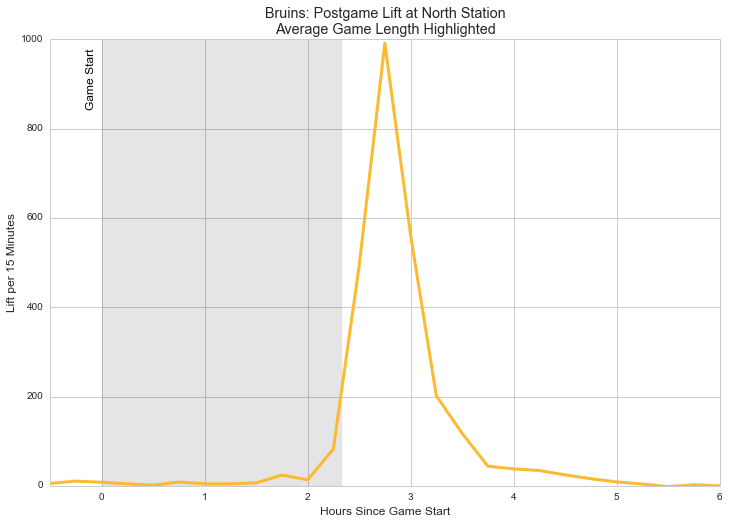

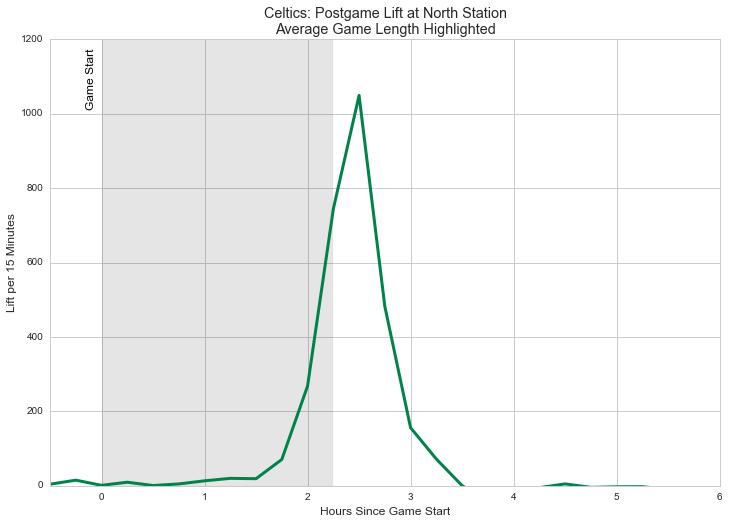

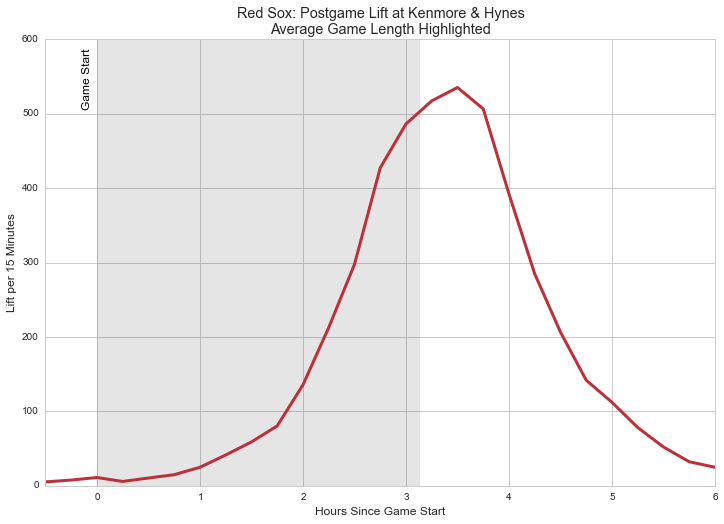

In [49]:
# Traverse teams.
for team, team_name in zip(teams, team_names):
    # Start plotting.
    plt.figure(figsize=figsize['default'])
    
    # Plot for team.
    postgame_agg_team = postgame_agg[team]
    plt.plot(postgame_agg_team.hours_since_game_start, postgame_agg_team.entry_lift, lw=3, c=team_colors[team])

    # Limits and axes.
    plt.ylim((0,plt.ylim()[1]))
    plt.xlim((postgame_agg_team.hours_since_game_start.min(), postgame_agg_team.hours_since_game_start.max()))

    # Labels.
    plt.title(team_name+': Postgame Lift at '+team_stations[team]+'\nAverage Game Length Highlighted', fontsize=fontsize['title'][default_chart_format])
    plt.xlabel('Hours Since Game Start', fontsize=fontsize['label'][default_chart_format])
    plt.ylabel('Lift per 15 Minutes', fontsize=fontsize['label'][default_chart_format])

    # Annotations.
    game_range(team_game_lengths[team], annotate_start=True, fontsize=fontsize['game_range'][default_chart_format])

    # Show.
    plt.show()

### Postgame Lift Distribution by Sport

TODO

---
## Statistics

TODO